In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

In [4]:
def extract_text(data_path):
    '''
    extract text(abstract) in data
    '''
    df = pd.read_csv(data_path)
    texts = df['abstract'].to_list()
    return texts

In [8]:
def tokenizer(text):
    tokens = RegTok.tokenize(text.lower())
    # stopwords 제외
    words = [word for word in tokens if (word not in english_stops) and len(word)>2]
    # porter stemmer 적용
    features = (list(map(lambda token: PorterStemmer().stem(token), words)))
    return features

In [5]:
# load data and extract texts (abstract)
path = '../data/trust_robot.csv'
papers = extract_text(path)

In [9]:
cachedStopWords = stopwords.words("english")
RegTok = RegexpTokenizer("[\w']{3,}")
english_stops = set(stopwords.words('english'))

tfidf = TfidfVectorizer(tokenizer=tokenizer)
papers_tfidf = tfidf.fit_transform(papers)

In [11]:
tsne = TSNE(n_components=2, random_state=7)
tsne_tfidf = tsne.fit_transform(papers_tfidf)
print('TSNE dimension:', tsne_tfidf.shape)

/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


TSNE dimension: (1236, 2)


In [24]:
def tsne_graph(tsne_2, lim=None):
    x = tsne_2[:, 0]
    y = tsne_2[:, 1]
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=x, y=y,
        palette=sns.color_palette("hls", 10),
        data=df_subset,
        legend="full",
        alpha=0.3
    )


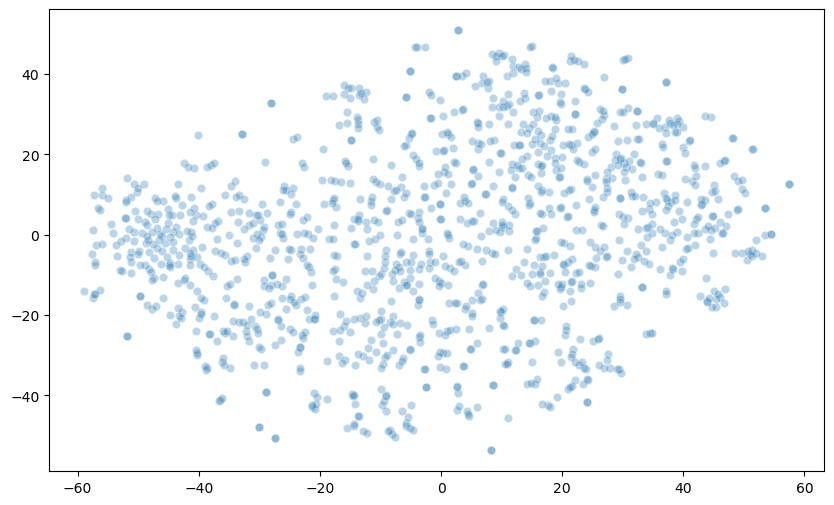

In [25]:
tsne_graph(tsne_tfidf)